In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("C:/Users/Don Augwin/OneDrive/Datasets/TATASTEEL.NS.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,11.172855,11.214964,11.035300,11.186892,2.487110,10242229.0
1,02-01-1996,11.172855,11.214964,10.951082,10.979155,2.440924,16954313.0
2,03-01-1996,10.979155,11.229000,10.951082,10.981962,2.441549,13514114.0
3,04-01-1996,10.807913,10.807913,10.386825,10.633863,2.364159,34785820.0
4,05-01-1996,10.504730,10.555260,10.316644,10.423319,2.317349,30138033.0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6.960000e+03
mean,38.829010,39.443728,38.134010,38.759588,16.588219,6.932547e+07
std,30.692635,31.099186,30.207740,30.637873,22.045341,5.808903e+07
min,3.705570,3.910499,3.705570,3.775751,0.873765,0.000000e+00
25%,10.675270,10.807913,10.480868,10.607896,2.386555,3.254723e+07
50%,34.914051,35.444186,34.312809,34.850887,12.086423,5.339005e+07
75%,51.866982,52.586300,51.076497,51.834828,18.565130,8.688652e+07
max,161.486557,161.486557,161.486557,161.486557,131.750000,6.428460e+08


In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
# Prepare data
data = df[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Convert 'Date' column to datetime format
data.set_index('Date', inplace=True)


C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_37208/2501238634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Convert 'Date' column to datetime format


In [13]:
# Splitting data into train and test sets
train = data.iloc[:-90]
test = data.iloc[-90:]

In [14]:
# Feature engineering: creating lagged features
for i in range(1, 6):  # Creating lagged features from 1 to 5 days
    train[f'lag_{i}'] = train['Close'].shift(i)
    test[f'lag_{i}'] = test['Close'].shift(i)


C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_37208/502344589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{i}'] = train['Close'].shift(i)
C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_37208/502344589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'lag_{i}'] = test['Close'].shift(i)


In [15]:
# Drop missing values due to lagging
train.dropna(inplace=True)
test.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
# Split features and target variable
X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']

In [17]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Machine (SVM)
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [18]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "Support Vector Machine")

Linear Regression - MSE: 5.10, R2 Score: 0.84
Random Forest - MSE: 3.91, R2 Score: 0.88
Support Vector Machine - MSE: 2.41, R2 Score: 0.92


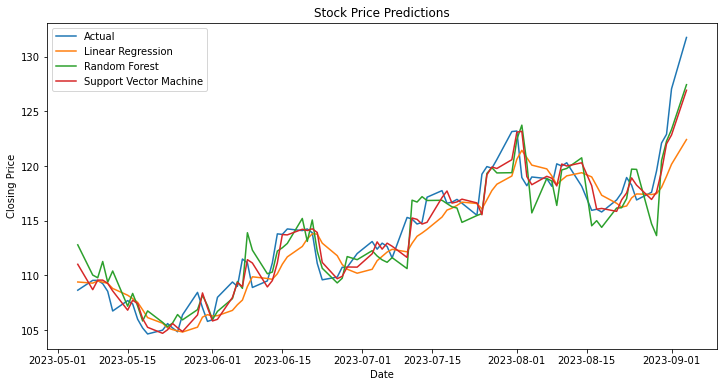

In [19]:
# Plotting predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, lr_pred, label='Linear Regression')
plt.plot(y_test.index, rf_pred, label='Random Forest')
plt.plot(y_test.index, svm_pred, label='Support Vector Machine')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Predictions')
plt.legend()
plt.show()